# Classification of driving behavior using acc. data

This notebooks uses the driving behavior dataset from Kaggle and aims to classify the driver's driving based on accelerometer data.

## Libraries

In [2]:
from matplotlib import pyplot as plt


import pandas as pd
import numpy as np

## Preprocessing

In [3]:
# loading data
df = pd.read_csv('datasets/train_motion_data.csv')

df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [4]:
# showing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [5]:
# basic statistics
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


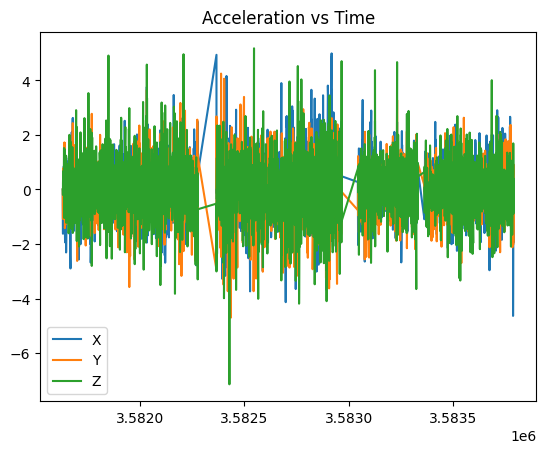

In [9]:
# Acceleration vs Time
plt.plot(df['Timestamp'], df['AccX'])
plt.plot(df['Timestamp'], df['AccY'])
plt.plot(df['Timestamp'], df['AccZ'])

plt.legend(['X', 'Y', 'Z'])
plt.title('Acceleration vs Time')
plt.show()

The dataset is clean with no null values. Becuase we are working with time-dependent physiscal measurements, we will not be removing the outliers as they carry important information regarding the driving at that moment in time.

From the plot, we can identify 4 distinct measurements and will analyse them separately.

First, we will calculate other parameters from the available data on acceleration.

## Enriching dataset

In [10]:
# acceleration norm
df['Acc'] = np.sqrt(df['AccX']**2 + df['AccY']**2 + df['AccZ']**2)

df = df.reindex(sorted(df.columns), axis=1)

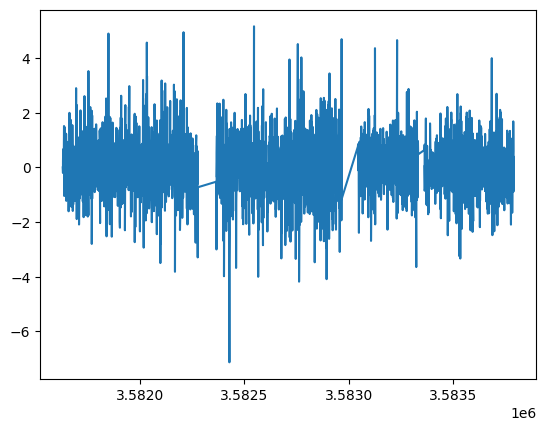

In [11]:
plt.plot(df['Timestamp'], df['AccZ'])